# RNSA Breast Cancer Detector:

    - Librerias

In [177]:
# Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Carga de datos

In [149]:
#Vamos a crear un bloque de comprobación para asegurar que los datos se cargan sin problema.

def GetData():
    print("Loading data...\n==========\n")
    try:
        data_train = pd.read_csv("../data/raw/train.csv")
        print("· Train data loaded")
    except Exception as e:
        print(f"· Train data is not loaded: Exception {e}\n==========\n")
    
    try:
        data_test = pd.read_csv("../data/raw/test.csv")
        print("· Train data is loaded")
    except Exception as e:
        print(f"· Test data is not loaded: Exception {e}\n==========\n")

    try:
        data_submision = pd.read_csv("../data/raw/sample_submission.csv")
        print("· Submission data is loaded\n==========\n")
    
    except Exception as e:
        print(f"· Submission data is not loaded: Exception {e}\n==========\n")

    return data_train, data_test, data_submision

#Desempaquetamos los Datasets si se han cargado correctamente.
try:
    dataTrain, dataTest, dataSub = GetData()
    print("...Data loaded succesfully")
except Exception as e:
    print(f"Error: {e}")

Loading data...

· Train data loaded
· Train data is loaded
· Submission data is loaded

...Data loaded succesfully


## Analisis de Datos

**Analisis de los datos NaN**

In [175]:
def DataNaNAnalysis(dataset):
    #Mostramos las dimensiones del dataset
    print(f"Data Dimensions: {dataset.shape}\n")

    #Mostramos las columnas que hay en el dataset
    print(f"Columns in Dataset:\n==========\n")
    
    for col in dataset:
        print(col)
    
    print("\n")

    #Creamos un filtro para obtener las columnas con valores no numericos.    
    nan_filter = dataset.isna().sum()
    data_nan = nan_filter[nan_filter > 0]

    if data_nan.empty:
        print("Non Nan Values\n")
    
    else:
        print("Nan Values:\n==========\n")
        for col, n in data_nan.items():
            print(f"Column {col}: {n} NaN values")



In [176]:

DataNaNAnalysis(dataTrain)

Data Dimensions: (54706, 14)

Columns in Dataset:

site_id
patient_id
image_id
laterality
view
age
cancer
biopsy
invasive
BIRADS
implant
density
machine_id
difficult_negative_case


Nan Values:

Column age: 37 NaN values
Column BIRADS: 28420 NaN values
Column density: 25236 NaN values


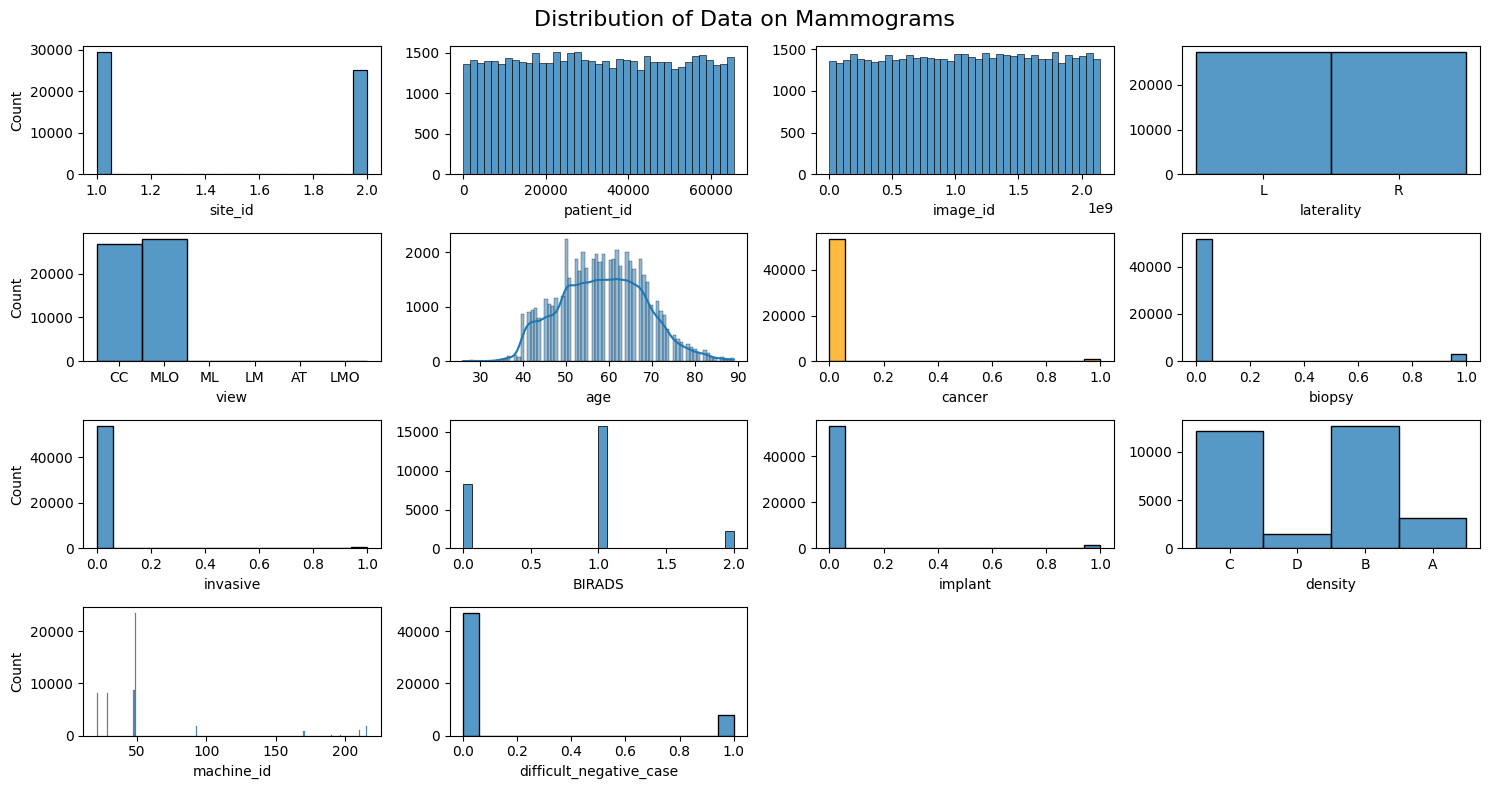

In [240]:
#Vamos a graficar los datos del dataframe para saber con los datos que estamos trabajando.

fig, axis = plt.subplots(4,4, figsize=(15,8))

sns.histplot(dataTrain, x=dataTrain["site_id"], ax=axis[0,0]) # Identifcador del centro donde se tomo la prueba.
sns.histplot(dataTrain, x=dataTrain["patient_id"], ax=axis[0,1]) #Identificador del paciente.
axis[0,1].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["image_id"], ax=axis[0,2]) #Image_ID es el identificador de la mamografia.
axis[0,2].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["laterality"], ax=axis[0,3]) #Determina si es el seno derecho o izquierdo.
axis[0,3].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["view"], ax=axis[1,0]) #Determina la vista de la mamografia.
sns.histplot(dataTrain, x=dataTrain["age"], ax=axis[1,1],kde=True) #Edad de la paciente.
axis[1,1].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["cancer"], ax=axis[1,2], color="orange") #TARGET. Determina si tiene o no cancer.
axis[1,2].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["biopsy"], ax=axis[1,3]) #Deterima si se ha hecho biopsia o no.
axis[1,3].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["invasive"], ax=axis[2,0]) #Determina si el cancer se ha propagado o no.
sns.histplot(dataTrain, x=dataTrain["BIRADS"], ax=axis[2,1]) #BI-RADS determina la malignidad del cancer.
axis[2,1].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["implant"], ax=axis[2,2]) #Determina si la paciente tiene o no implantes.
axis[2,2].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["density"], ax=axis[2,3]) #Determina la densidad del tejido mamario.
axis[2,3].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["machine_id"], ax=axis[3,0]) #Identificador de la maquina que hizo la mamografia.
sns.histplot(dataTrain, x=dataTrain["difficult_negative_case"], ax=axis[3,1]) #Determina si la mamografia es dificil de interpretar.
axis[3,1].set_ylabel(None)

axis[3,2].axis("off")
axis[3,3].axis("off")

plt.suptitle("Distribution of Data on Mammograms", fontsize=16)

plt.tight_layout()
plt.show()